In [44]:
import pickle
# from collections import namedtuple
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
import pandas as pd

warnings.filterwarnings("ignore")

sns.set()

In [2]:
with open("./pickle/AD00203_3.pickle", "rb") as f:  
    dataframe = pickle.load(f)

In [64]:
with open("./pickle/AD00204_3.pickle", "rb") as f:  
    data2 = pickle.load(f)

In [24]:
dataframe["results"]["dtc"]["full"][0]["accuracy"]

0.871

In [66]:
def compare_scores(dataframe, algorithm="knn"):
    f1s = {}
    accs = {}
    for key in dataframe['results'][algorithm]:
        f1a = 0
        acc = 0
        for i in range(3):
            f1a += dataframe['results'][algorithm][key][i]['f1_score']
            acc += dataframe['results'][algorithm][key][i]['accuracy']
        f1a = round(f1a / 3, 3)
        acc = round(acc / 3, 3)
        f1s[key] = f1a
        accs[key] = acc
    return f1s, accs

In [39]:
f1s_knn, acc_knn = compare_scores(algorithm="knn")

In [67]:
res2 = []
for alg in ("knn", "lrc", "svm", "mnb", "dtc"):
    f1s, acc = compare_scores(data2, alg)
    res2.append((alg, f1s["full"]))

In [69]:
res2
df2 = pd.DataFrame(res2, columns=["classifiers", "AD00204"])
df2 = df2.set_index("classifiers")
df2.index.name = None
df2 = df2.T
df2

,knn,lrc,svm,mnb,dtc
AD00204,0.997,0.998,0.998,0.998,0.98


In [48]:
df

,0,1
0,knn,0.814
1,lrc,0.975
2,svm,0.974
3,mnb,0.967
4,dtc,0.869


In [57]:
df = pd.DataFrame(res, columns=["classifiers", "AD00203"])

In [58]:
df = df.set_index("classifiers")
df.index.name = None

In [60]:
df = df.T

In [71]:
final_res_df = pd.concat([df, df2])

In [72]:
final_res_df

,knn,lrc,svm,mnb,dtc
AD00203,0.814,0.975,0.974,0.967,0.869
AD00204,0.997,0.998,0.998,0.998,0.980


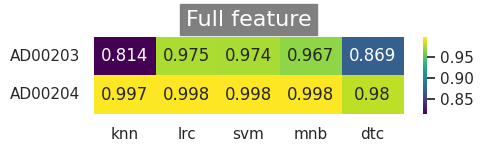

In [76]:
sns.set (rc = {'figure.figsize':(5, 1)})
ax = sns.heatmap(final_res_df, annot=True, fmt='g',cmap=sns.color_palette("viridis", as_cmap=True))
# plt.title('Full feature')
title = "Full feature"
ax.set_title(title, fontsize=16, backgroundcolor='gray', color='white', pad=8)
plt.show()

In [ ]:
sorted(f1s.items(), key=lambda item: item[1], reverse=True)

In [ ]:
sorted(acc.items(), key=lambda item: item[1], reverse=True)

In [ ]:
def confusion_mtx(algorithm="knn", tryno=1):

    truth = dataframe['results'][algorithm][tryno]['ground_truth']
    pred = dataframe['results'][algorithm][tryno]['prediction']
    cm = confusion_matrix(truth, pred)
    return cm
    # f = sns.heatmap(cm, annot=True, fmt='d')
    # return f

def plot_confusion():
    fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
    fig.suptitle('Confusion matrixes for knn with 3 repeats')

    # Bulbasaur
    sns.heatmap(confusion_mtx(algorithm="knn", tryno=0), ax=axes[0], annot=True, fmt='d')

    axes[0].set_title("repeat 1")

    # Charmander
    sns.heatmap( confusion_mtx(algorithm="knn", tryno=1), ax=axes[1], annot=True, fmt='d')
    axes[1].set_title("repeat 2")

    # Squirtle
    sns.heatmap(confusion_mtx(algorithm="knn", tryno=2), ax=axes[2], annot=True, fmt='d')
    axes[2].set_title("repeat 3")



In [ ]:
plot_confusion()